# Dense & Deep Neural Networks

We have only covered simple parametric models so far and we've only been studying the single neuron model. Neural networks is literally an expansion of these concepts. Instead of a single nueorn, neural networks contain multiple layers of interconnected neurons. Each hidden layer of neurons receive input from the last layer. The output of the final layer is the final output of the network as a whole. This algorithm is inspired by the human brain, and definitely a bit more realistic than a single neuron model!

Neural networks work for both regression and classification tasks. In particular, neural networks are a great strategy for models that aren't linearly separable (and even look a little wonky :)), and it can pretty much learn any dataset (but we may run into the problem of overfitting). Neural networks can also perform dimensionality reduction, meaning we can take a multidimensional matrix and reduce it down to a smaller dimension to work with. 

# How does a neural network actually work?
Each individual node acts as its own single neuron model, composed of weights and biases and an output. This time, however, we are dealing with an entire layer of nodes. For a single neuron, the $z$ output is the same: $z = b+ w_1x_1 + w_2x_2 +...w_nx_n$. This scalar output effectively functions as a new input for the next layer of neurons- a phase called *feed-forward*. We can do this process for each layer until an output is arrived at. Passing a signal through these layers creates a highly composite function that approximates a target function $f$.

The Univervsal Approximation Theorem summarizes this pretty well. Essentially, the use of a nonlinear activation function (i.e.: Sigmoid!?) within the neural network can approximate any "reasonable" function, given that a network has at least one hidden layer of nonlinear units and a single linear output. Without this component of nonlinearity, the model would be reduced down to linear regression and it would not be able to learn the complex relationships between points. For example, we can use the Sigmoid function, but other common functions include: tanh, RELU, and Maxout. 

The next big step to the neural network algorithm is the cost function, dubbed *backpropogating*. We find the gradient of the cost function and update with a learning rate, as backpropogation is a method to adjust the weights from the errors found during learning. Errors from the ouput are sent backward through the network to adjust the weights and bisases. This iteration continues until the cost function is minimized, so this is just a large scale version of our single neuron model!


Neural networks are extensively powerful, but they also have their own limitations. For one, neural networks are computationally expensive and have been criticized to require too many training samples in order to be suitable for real-world operation. As such, they also tend to be prone to overfitting and require careful parameter tuning. Still, these remain a powerful tool for solving ML problems. 


Neural networks are used across many industries, including medical image classifications, financial predictions, chemical compound identification, and many,many more. It's a huge element of supervised learning. In this notebook, we will utilize the TensorFlow package (so we don't have to write our own dense class!) to analyze the diabetes dataset.

# Application

[Diabetes dataset source](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


Luckily for us, we don't have to one-hot encode anything in the diabetes dataset, as all data is measured by numerical scales! The doctors really had our backs on that one.

In [16]:
df= pd.read_csv(r"C:\Users\faith\inde 577\INDE577\577repo\Supervised Learning\Datasets\diabetes_012_health_indicators_BRFSS2015.csv")
df= df.dropna()

X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
y = df.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = X_scaled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)



In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer with 3 neurons and softmax activation
])

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3)


Epoch 1/3
5312/5312 [==============================] - 5s 911us/step - loss: 0.3967 - accuracy: 0.8481
Epoch 2/3
5312/5312 [==============================] - 5s 933us/step - loss: 0.3965 - accuracy: 0.8478
Epoch 3/3
5312/5312 [==============================] - 5s 1ms/step - loss: 0.3962 - accuracy: 0.8484


In [35]:
model.evaluate(X_test, y_test, verbose= 2)

2617/2617 - 1s - loss: 0.3940 - accuracy: 0.8477 - 1s/epoch - 484us/step


[0.39396530389785767, 0.8477452993392944]

Epoch 1/3
5312/5312 [==============================] - 8s 2ms/step - loss: 0.3959 - accuracy: 0.8486 - val_loss: 0.3929 - val_accuracy: 0.8493
Epoch 2/3
5312/5312 [==============================] - 10s 2ms/step - loss: 0.3958 - accuracy: 0.8482 - val_loss: 0.3938 - val_accuracy: 0.8458
Epoch 3/3
5312/5312 [==============================] - 10s 2ms/step - loss: 0.3955 - accuracy: 0.8487 - val_loss: 0.3913 - val_accuracy: 0.8501


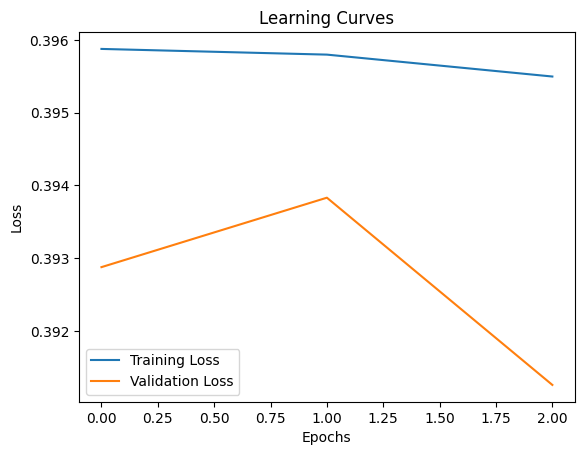

In [37]:
history = model.fit(X_train, y_train, epochs= 3, validation_data=(X, y))

# Plot learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()


We can see the model is overfitting.